<a href="https://colab.research.google.com/github/JAYANTHNITW/Deep_Learning_Models/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from keras.optimizers import Adam
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout


In [28]:
x,y = make_moons(100,noise=0.5,random_state=2)

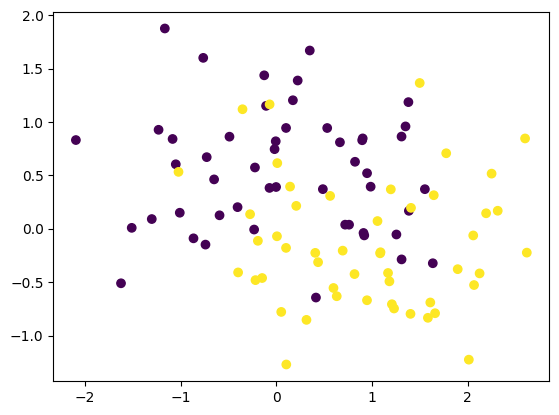

In [29]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [30]:
model1= Sequential()

model1.add(Dense(100,activation='relu',input_dim=2))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               300       
                                                                 
 dense_11 (Dense)            (None, 50)                5050      
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,401
Trainable params: 5,401
Non-trainable params: 0
_________________________________________________________________


In [31]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [32]:
history1 = model1.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 14s 1ms/step


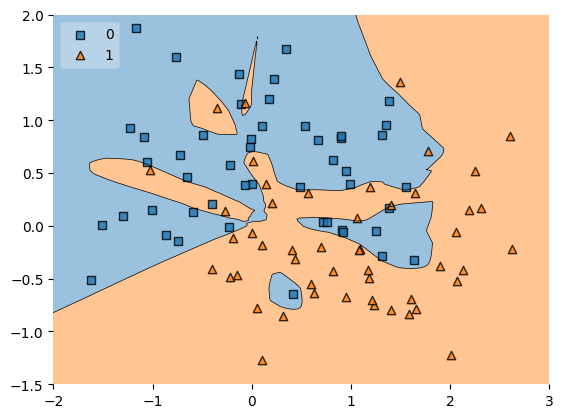

In [33]:
plot_decision_regions(x,y.astype('int'),clf=model1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [34]:
#pip install mlxtend --upgrade --no-deps

In [35]:
model2= Sequential()

model2.add(Dense(100,activation='relu',input_dim=2,kernel_regularizer=keras.regularizers.l2(0.02)))
model2.add(Dense(50,activation='relu',kernel_regularizer=keras.regularizers.l2(0.02)))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               300       
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,401
Trainable params: 5,401
Non-trainable params: 0
_________________________________________________________________


In [36]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [37]:
history2 = model2.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 14s 1ms/step


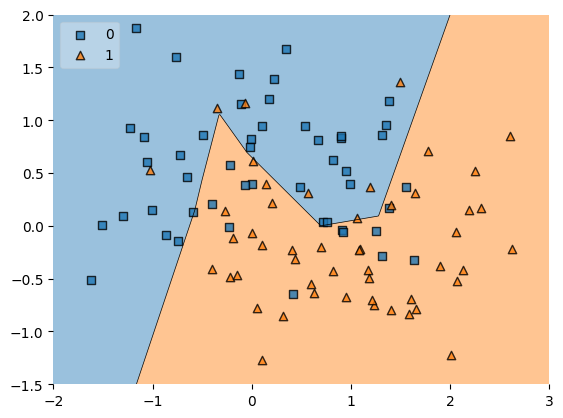

In [38]:
plot_decision_regions(x,y.astype('int'),clf=model2,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [39]:
model1.get_weights()[0]

array([[-5.1282096e-01, -3.6037055e-01, -9.1823882e-01, -1.1927662e+00,
        -5.6668633e-01, -5.1400542e-01,  2.3929438e-01,  3.1025586e-01,
         5.7665044e-01,  7.6079655e-01,  3.6718410e-01, -5.1820326e-01,
         2.5029564e-01,  2.8141004e-01,  5.1419181e-01, -2.2305870e-01,
        -1.4263695e-01, -9.1372067e-01, -1.3955992e+00, -6.8419695e-01,
        -2.8849549e+00,  3.1277296e-01,  6.7635715e-02,  2.0796672e-01,
         8.4972948e-02, -7.4239516e-01, -4.8226532e-01,  4.6117358e-02,
        -2.0000698e-01,  1.7854622e-02, -1.4455882e+00,  2.3488281e-02,
        -9.9112016e-01, -3.2959161e+00,  3.2975021e-01,  1.5917327e-01,
         7.0241189e-01, -1.3515630e-01,  3.6898732e-01,  6.8740457e-01,
        -4.0660474e-02, -5.5310690e-01, -8.1684954e-02,  2.6031888e-01,
        -7.1245742e-01,  3.6731145e-01, -1.0624778e+00,  1.7070149e-01,
         1.7549373e-01, -1.0272447e+00, -8.9404017e-01, -5.6334478e-01,
        -6.6883940e-01, -2.6029676e-02,  1.1292829e-01, -4.61793

In [40]:
model1.get_weights()[0].shape

(2, 100)

As we have 2 inputs layers and 100 nodes in 1st layer

In [41]:
model1_weight_layer1 = model1.get_weights()[0].reshape(200)

In [42]:
model2_weight_layer1 = model2.get_weights()[0].reshape(200)

<Axes: >

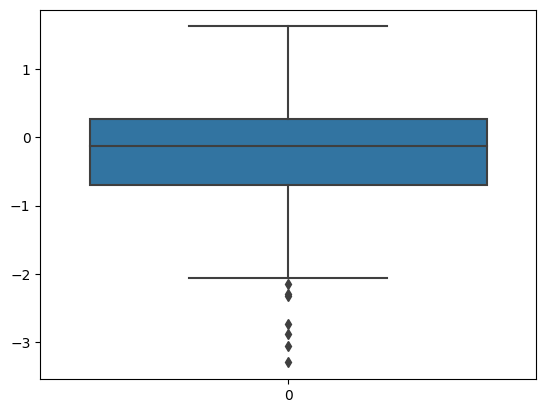

In [43]:
sns.boxplot(model1_weight_layer1)

<Axes: >

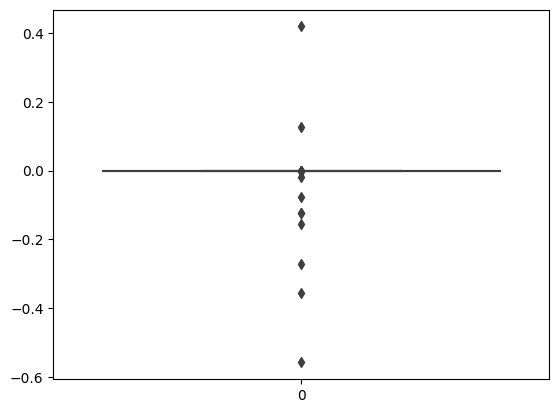

In [44]:
sns.boxplot(model2_weight_layer1)


In [45]:
model2_weight_layer1.max()

0.41914323

In [46]:
model1_weight_layer1.max()

1.6208206

Obervation: as we know after appling regularization the values of weights will decrease bascially range shrinks.

In [47]:
model2_weight_layer1.min()

-0.558352

In [48]:
model1_weight_layer1.min()

-3.295916

<ipython-input-49-99b939c7ee98>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-49-99b939c7ee98>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

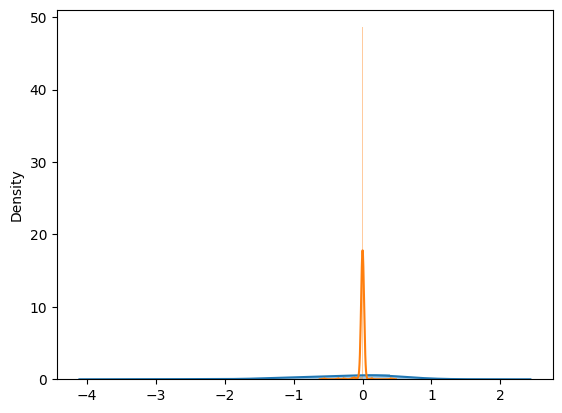

In [49]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)